In [1]:
# Importing requried libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve,roc_auc_score

import pickle
import warnings
warnings.filterwarnings('ignore')

# Step 1. Data Selection

In [2]:
# Loading the dataset

df=pd.read_csv ("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.head()   #Showing first five rows.

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail()   #Showing last 5 rows.

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
df.shape # checking data dimension

(30, 17)

In [6]:
pd.set_option('display.max_rows',None)

In [7]:
df.info() #information about dataset like data type, Null values etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.dtypes #data type

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [9]:
df.isnull().sum()  #To check for null values.

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Step 2. Data description

In [10]:
df.describe() #statistical summary

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


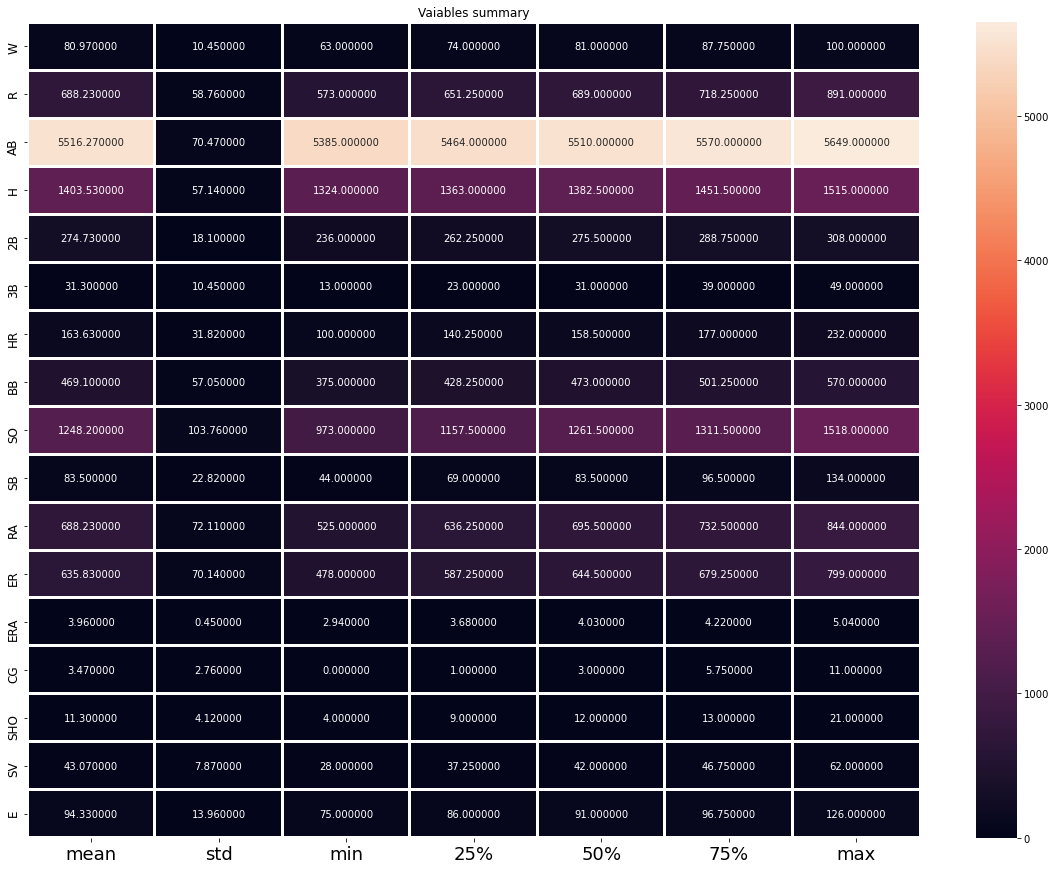

In [11]:
# Let's visualized above dataset.

plt.figure(figsize=(20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Vaiables summary")
plt.show()

In [12]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

In [13]:
data = df['W'].value_counts() #Storing target values in the variable data.

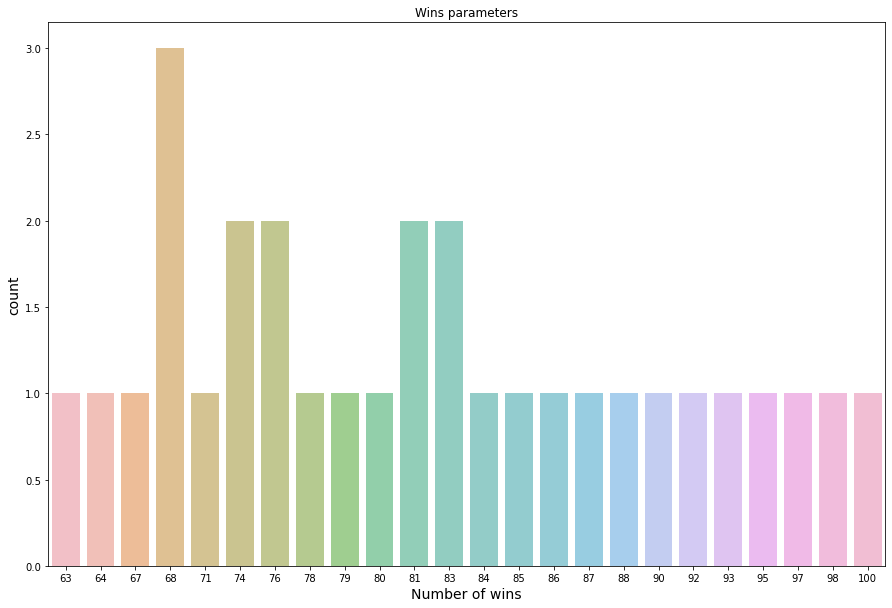

In [14]:
#Let's visulaized target parameter.

plt.figure(figsize=(15,10))
sns.barplot(data.index,data.values,alpha=0.6)
plt.xlabel("Number of wins",fontsize=14)
plt.ylabel("count",fontsize=14)
plt.title("Wins parameters")
plt.show()

<AxesSubplot:xlabel='R', ylabel='W'>

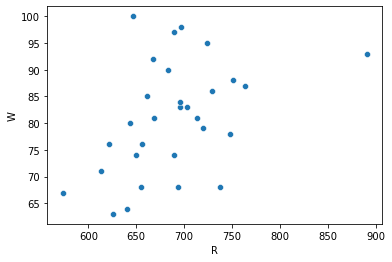

In [15]:
sns.scatterplot(x='R',y='W',data=df)

<AxesSubplot:xlabel='AB', ylabel='W'>

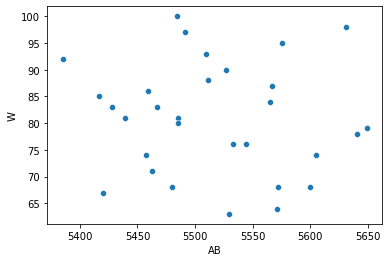

In [16]:
sns.scatterplot(x='AB',y='W',data=df)

<AxesSubplot:xlabel='H', ylabel='W'>

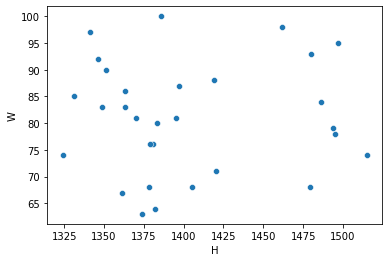

In [17]:
sns.scatterplot(x='H',y='W',data=df)

<AxesSubplot:xlabel='2B', ylabel='W'>

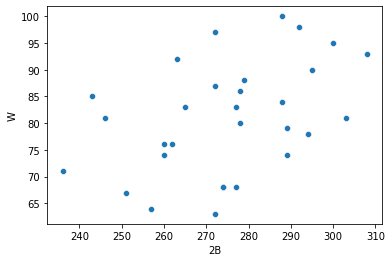

In [18]:
sns.scatterplot(x='2B',y='W',data=df)

<AxesSubplot:xlabel='3B', ylabel='W'>

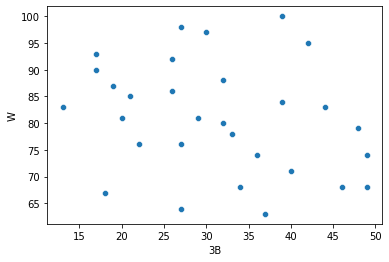

In [19]:
sns.scatterplot(x='3B',y='W',data=df)

It showing relationship between 3B with respect to W parameter.

<AxesSubplot:xlabel='HR', ylabel='W'>

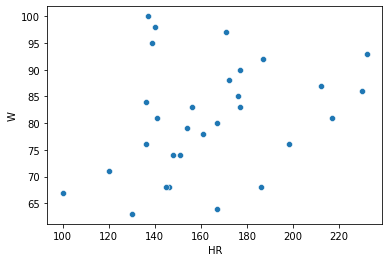

In [20]:
sns.scatterplot(x='HR',y='W',data=df)

<AxesSubplot:xlabel='BB', ylabel='W'>

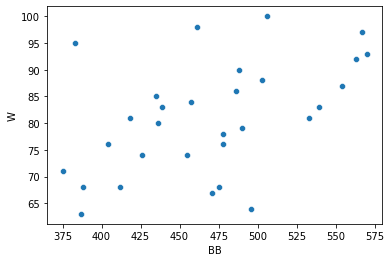

In [21]:
sns.scatterplot(x='BB',y='W',data=df)

In [ ]:
It showing relationship between BB with respect to W parameter.

<AxesSubplot:xlabel='SO', ylabel='W'>

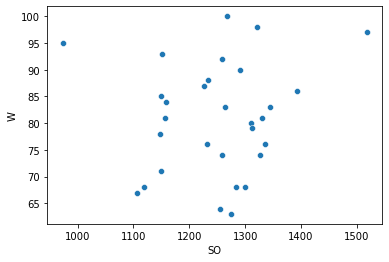

In [22]:
sns.scatterplot(x='SO',y='W',data=df)

<AxesSubplot:xlabel='SB', ylabel='W'>

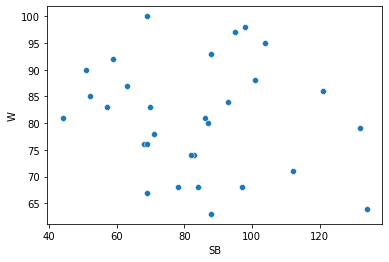

In [23]:
sns.scatterplot(x='SB',y='W',data=df)

<AxesSubplot:xlabel='RA', ylabel='W'>

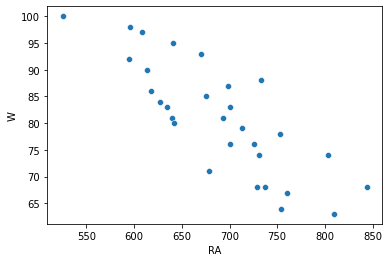

In [24]:
sns.scatterplot(x='RA',y='W',data=df)

<AxesSubplot:xlabel='ER', ylabel='W'>

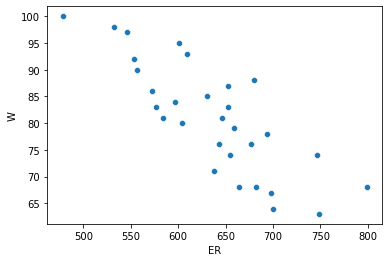

In [25]:
sns.scatterplot(x='ER',y='W',data=df)

<AxesSubplot:xlabel='ERA', ylabel='W'>

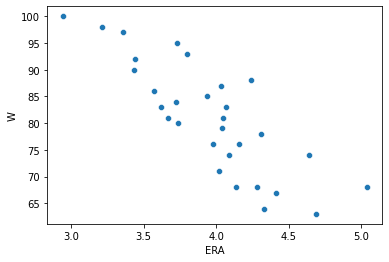

In [26]:
sns.scatterplot(x='ERA',y='W',data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

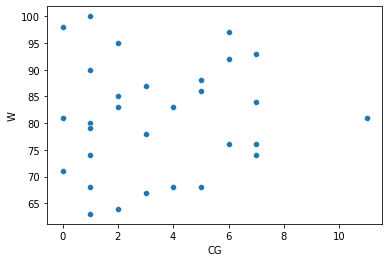

In [27]:
sns.scatterplot(x='CG',y='W',data=df)

<AxesSubplot:xlabel='SHO', ylabel='W'>

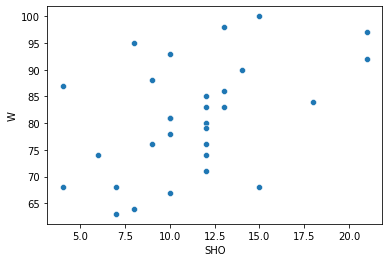

In [28]:
sns.scatterplot(x='SHO',y='W',data=df)

<AxesSubplot:xlabel='SV', ylabel='W'>

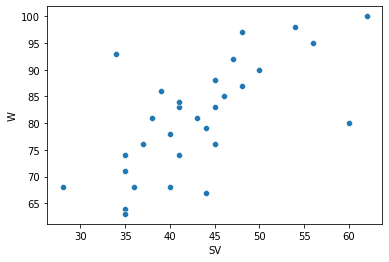

In [29]:
sns.scatterplot(x='SV',y='W',data=df)

<AxesSubplot:xlabel='E', ylabel='W'>

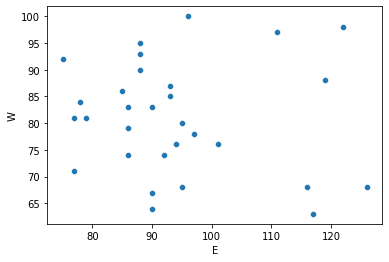

In [30]:
sns.scatterplot(x='E',y='W',data=df)

# Step 3. Data tranformation and derivation of new attributes.

In [31]:
corr_mat = df.corr() # Checking for correlation

In [32]:
corr_mat

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


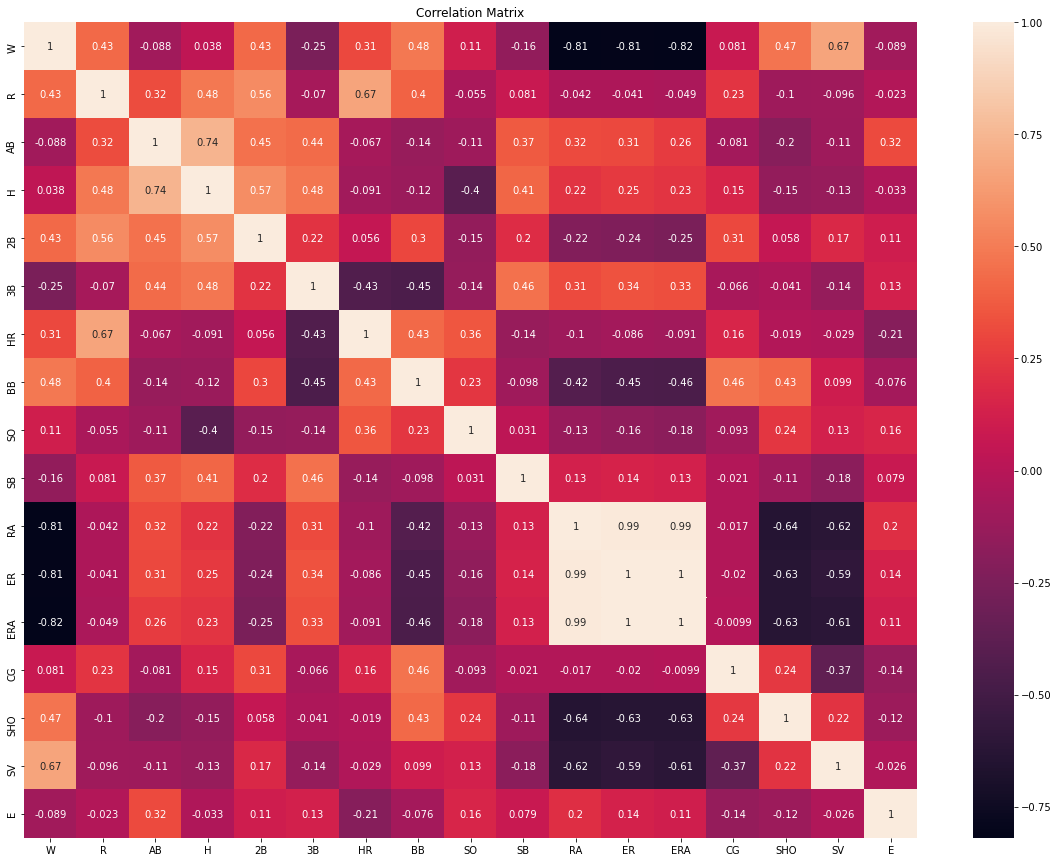

In [33]:
# visulization of correlated values.

plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Step 4. Data standarization and normalization

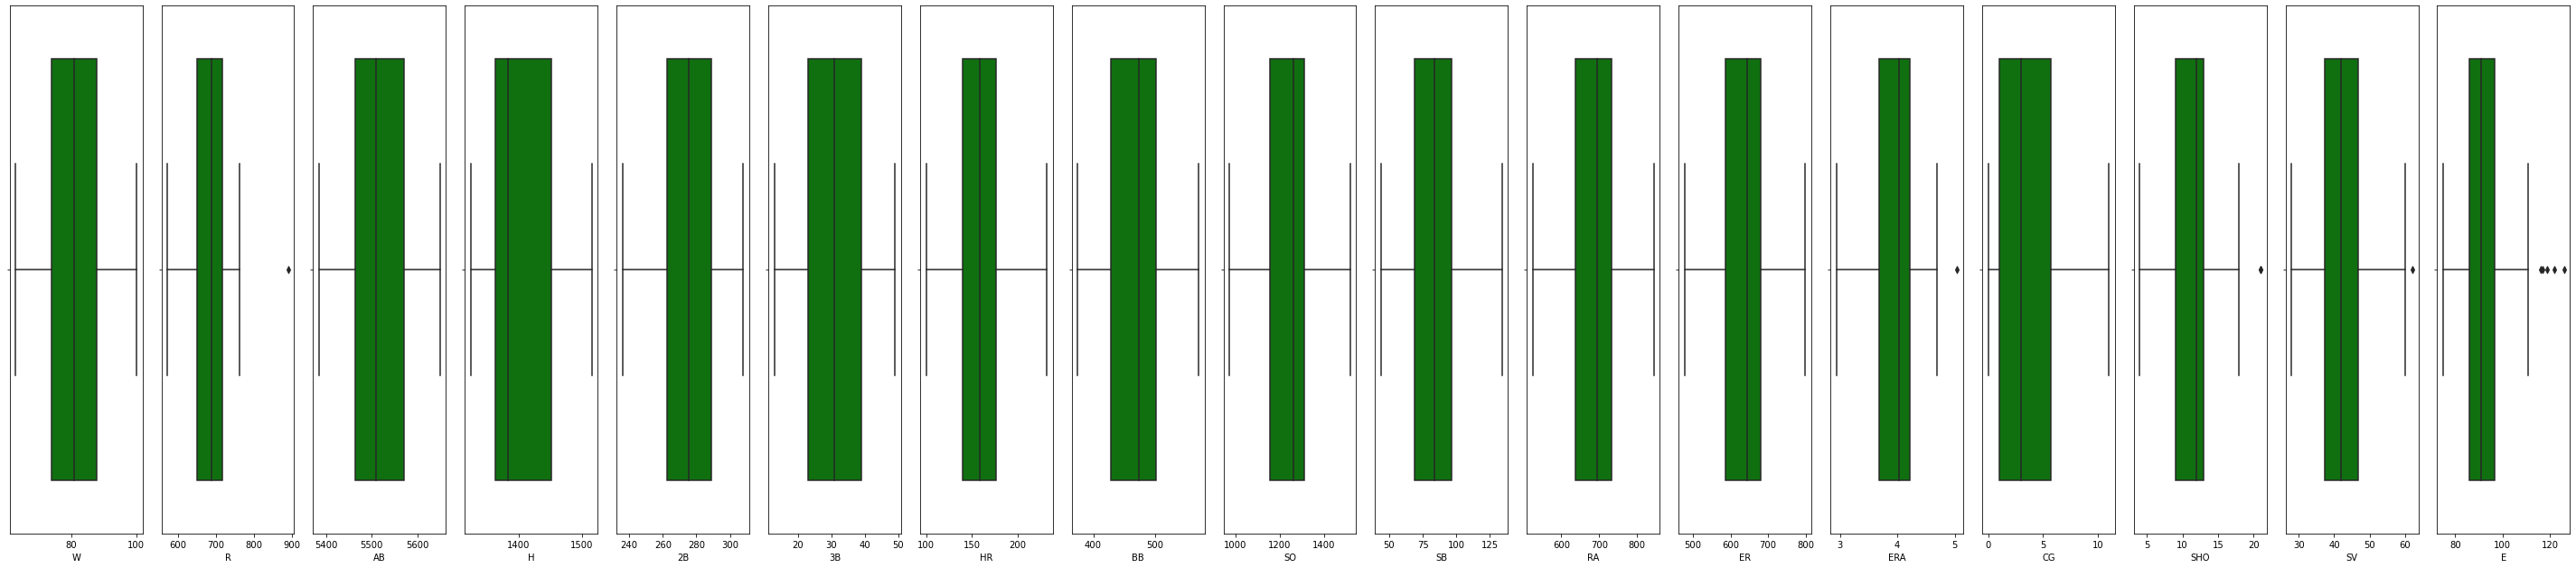

In [34]:
collist=df.columns.values
ncol=30
nrows=15
plt.figure(figsize=(70,130))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [35]:
df.skew() #to check skewness.

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<AxesSubplot:xlabel='W', ylabel='Density'>

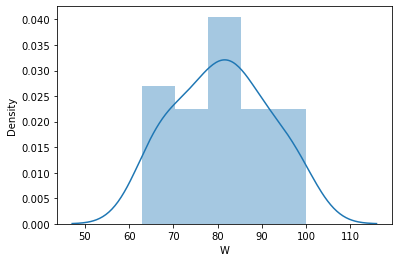

In [36]:
sns.distplot(df['W'])

<AxesSubplot:xlabel='AB', ylabel='Density'>

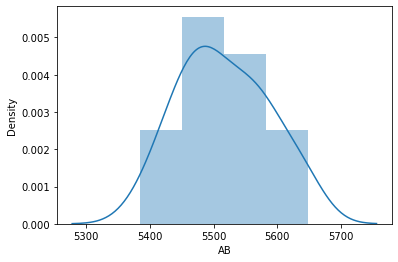

In [37]:
sns.distplot(df['AB'])

<AxesSubplot:xlabel='H', ylabel='Density'>

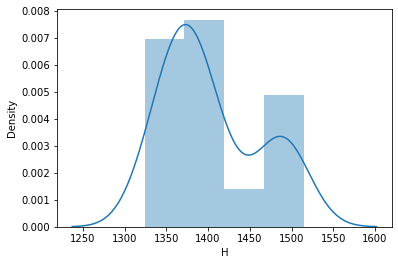

In [38]:
sns.distplot(df['H'])

<AxesSubplot:xlabel='2B', ylabel='Density'>

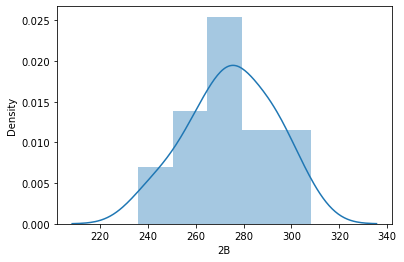

In [39]:
sns.distplot(df['2B'])

<AxesSubplot:xlabel='3B', ylabel='Density'>

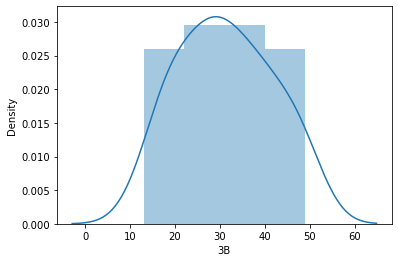

In [40]:
sns.distplot(df['3B'])

<AxesSubplot:xlabel='HR', ylabel='Density'>

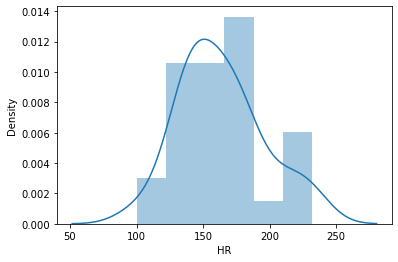

In [41]:
sns.distplot(df['HR'])

It shows skewness for HR.

<AxesSubplot:xlabel='BB', ylabel='Density'>

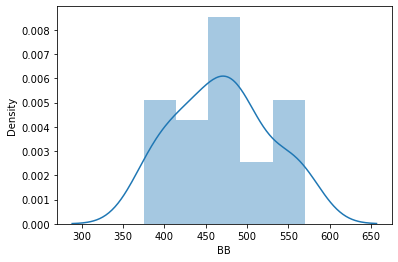

In [42]:
sns.distplot(df['BB'])

<AxesSubplot:xlabel='SO', ylabel='Density'>

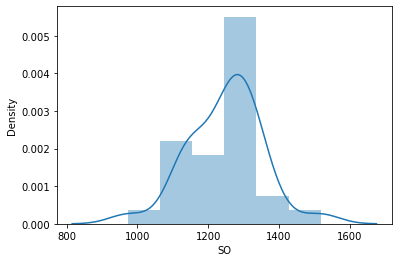

In [43]:
sns.distplot(df['SO'])

<AxesSubplot:xlabel='SB', ylabel='Density'>

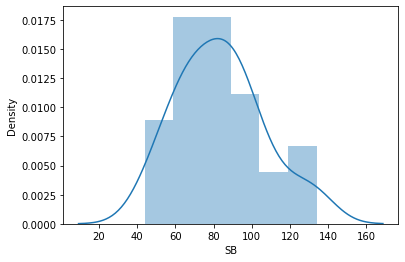

In [44]:
sns.distplot(df['SB'])

<AxesSubplot:xlabel='RA', ylabel='Density'>

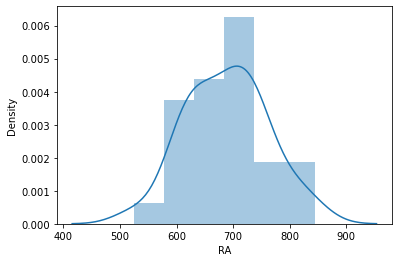

In [45]:
sns.distplot(df['RA'])

<AxesSubplot:xlabel='ER', ylabel='Density'>

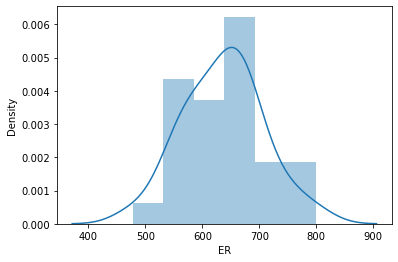

In [46]:
sns.distplot(df['ER'])

<AxesSubplot:xlabel='ERA', ylabel='Density'>

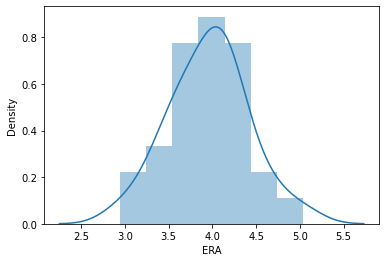

In [47]:
sns.distplot(df['ERA'])

<AxesSubplot:xlabel='CG', ylabel='Density'>

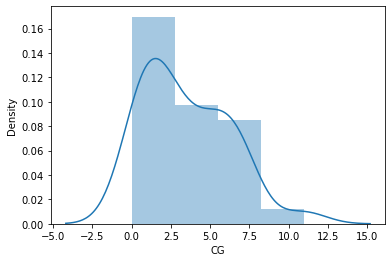

In [48]:
sns.distplot(df['CG'])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

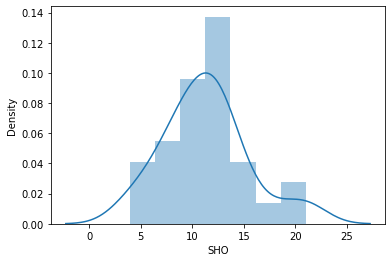

In [49]:
sns.distplot(df['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

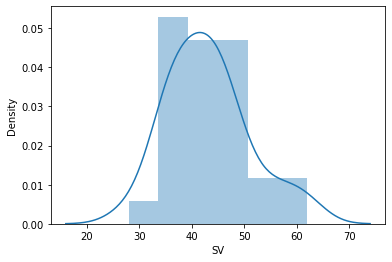

In [50]:
sns.distplot(df['SV'])

<AxesSubplot:xlabel='E', ylabel='Density'>

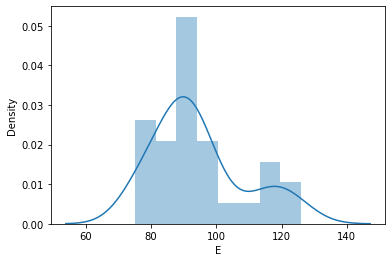

In [51]:
sns.distplot(df['E'])

In [52]:
from scipy.stats import zscore  #Importing requried library.

z = np.abs(zscore(df))
z.shape

(30, 17)

In [53]:
threshold=4                 #keeping threshold value as 3.
print(np.where(z>4))

(array([], dtype=int64), array([], dtype=int64))


In [54]:
df_new = df[(z<4).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(30, 17)


In [55]:
loss_percent=(30-30)/30*100
print(loss_percent)  

0.0


# Step 5. Creation of train and test data sets using optimum parameters

In [56]:
# Splitting Happiness Score from rest of dataset
y = df['W']
x = df.drop(columns=['W'])

In [57]:
x.head() #Showing columns without column W.

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [58]:
y.head() #showing only column W.

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

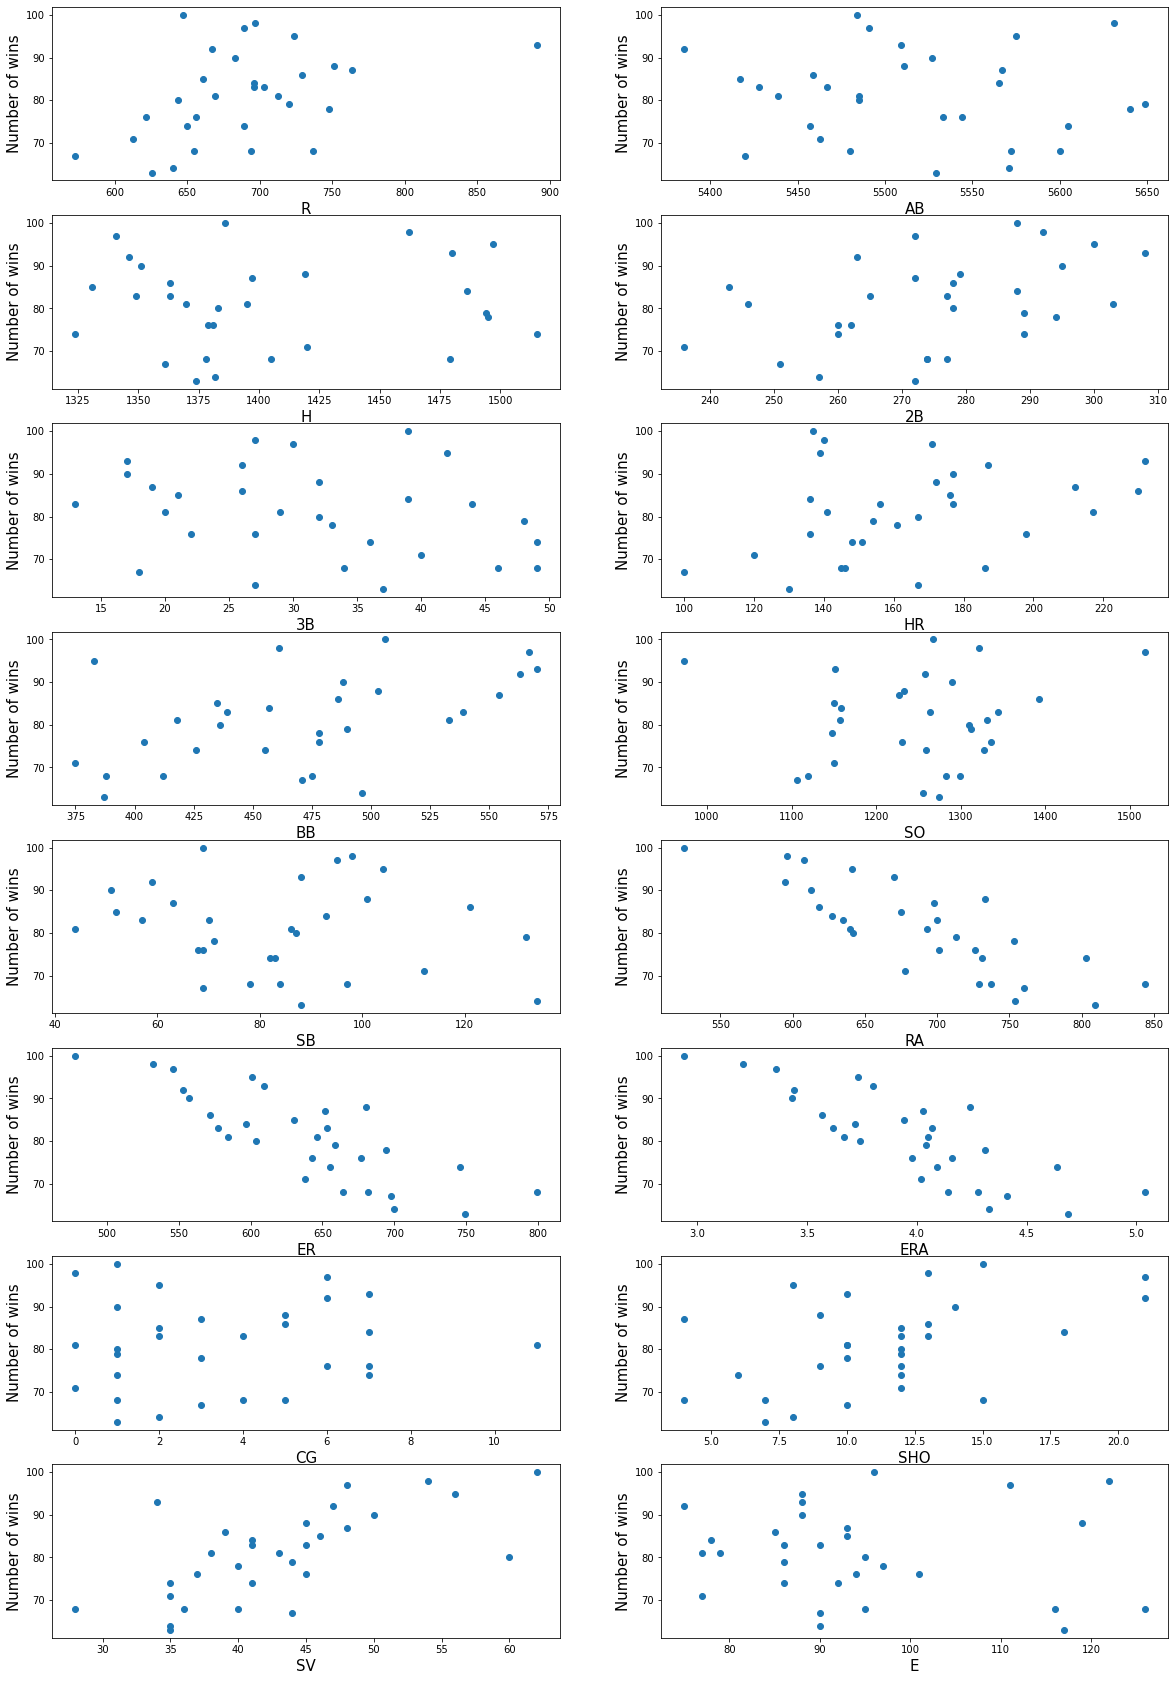

In [59]:
# Visualizing relationship

plt.figure(figsize=(20,30),facecolor = 'White')
plotnumber = 1

for column in x:
    if plotnumber<=16:
        ax = plt.subplot(8,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Number of wins',fontsize=15)
    plotnumber+=1
plt.show() 

In [60]:
# Data Scaling
#StandardScaler = (X-mean)/std

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled  

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [62]:
# Split data into train and test. Model will be built on training data and tested on test data

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)
y_train

8      80
9      78
16     98
19     64
20     90
29     68
5      93
26     84
10     88
15    100
6      87
13     76
27     79
3      76
28     74
0      95
1      83
23     67
17     97
2      81
25     92
4      74
Name: W, dtype: int64

# Step 5. Model training using ML algorithm

In [63]:
# Model instantiating and training

regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [64]:
# To find Intercept
print(regression.intercept_)

# To find coefficients
print(regression.coef_)

81.40561802866208
[  5.22931055   1.46642414  -1.76603966  -1.62994393   2.94894329
   0.74108032   0.20424704  -2.72896998  -1.22920504  10.13156051
 -13.3981144   -2.35027808   1.94909948   2.01029135   3.95816903
   2.34402468]


In [65]:
# Adjusted R2 Score 

regression.score(x_train,y_train)

0.9713927759130626

In [66]:
regression.score(x_test,y_test)

-0.04460920240081334

In [67]:
y_pred = regression.predict(x_test)
y_pred

array([91.049092  , 76.54334383, 67.23985557, 71.76311218, 83.48939693,
       81.73700987, 82.27140039, 64.07533009])

In [68]:
data = pd.DataFrame({'Acutal data':y_test,'Predicted data':y_pred})
data

,Acutal data,Predicted data
14,68,91.049092
7,81,76.543344
22,71,67.239856
18,68,71.763112
12,85,83.489397
11,86,81.737010
21,83,82.271400
24,63,64.075330


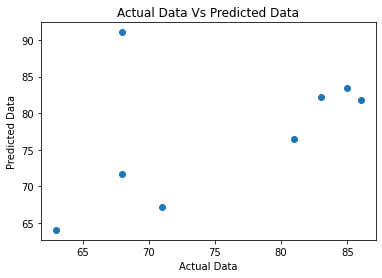

In [69]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data Vs Predicted Data')
plt.show()

In [70]:
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean squared error :',mean_squared_error(y_test,y_pred))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 5.3258159595414
Mean squared error : 75.19554055407104
Root mean squared error : 8.671536228031977


In [71]:
#Lasso Regularization 
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [72]:
alpha = lasscv.alpha_
alpha

0.06308786988377378

In [73]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.06308786988377378)

In [74]:
lasso_reg.score(x_test,y_test)

0.15271142376294367

Model No. 2 AdaBoostRegressor

In [75]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score                  #importing requried library.

In [76]:
ada = AdaBoostRegressor()

In [77]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [78]:
y_pred = ada.predict(x_train)

In [79]:
print("R square score:",r2_score(y_train,y_pred))

R square score: 0.9910602492569861


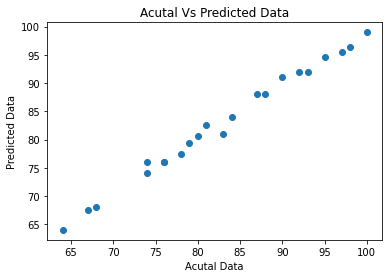

In [80]:
plt.scatter(y_train,y_pred)
plt.xlabel('Acutal Data')
plt.ylabel('Predicted Data')
plt.title('Acutal Vs Predicted Data')
plt.show()

In [81]:
#HyperParameter Tunning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor                    #importing requried library.

In [82]:
dt = DecisionTreeRegressor()

In [83]:
params = {'n_estimators':[40,47,49,50],
         'learning_rate':[0.30,0.40,0.45]}

In [84]:
rad_scr = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [85]:
rad_scr.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [86]:
rad_scr.best_params_

{'n_estimators': 49, 'learning_rate': 0.4}

In [87]:
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=0.4,n_estimators=50)

In [88]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.4)

In [89]:
y_pred=ada.predict(x_test)

In [90]:
print('***Accuracy post tuning***')
print(r2_score(y_test,y_pred))

***Accuracy post tuning***
0.43564141523768174


# Step No.6 Saving Model

In [91]:
import joblib  #importin requried library

In [92]:
joblib.dump(regression,"BaseballCaseStudy.pkl")

['BaseballCaseStudy.pkl']